In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_data(data, axis, frames_lost, y_label, legend_unit, y_lim=[]):
    axis.plot(data)
    
    for frame_lost in frames_lost:
        axis.axvline(x=frame_lost, color="r")
        
    axis.set_xlabel("Frame number")
    axis.set_ylabel(y_label)
    axis.set_title(y_label + " during connection")
    
    if y_lim != []:
        axis.axis(ymin=y_lim[0], ymax=y_lim[1])
    
    avrg = round(np.average(data), 2)
    axis.legend(["Avg: " + str(avrg) + legend_unit])

def plot_graphs(file_name, fps):
    with open(file_name, "rb") as file:
        cam_data = np.load(file)
        
    print("Data shape:", cam_data.shape)
    total_frames = cam_data.shape[1]
    print("Total frames:", total_frames)
    
    connection_time = round((total_frames / fps) / 60, 0)  # Maybe add this to the title of the plots.
    print("Connection time:", connection_time, "minutes")
    
    all_fps = cam_data[0, :]
    # Removing the zeros, which is present in the first second before obtaining the first average FPS over the first second.
    all_fps = all_fps[all_fps != 0] 
    
    all_delays = cam_data[1, :] * 1000  # Converting to milliseconds.
    all_img_bytes = cam_data[2, :]
    frames_lost = cam_data[3, :]
    
    # Removing the minus one fillers, see testing_cam_connection.py for why.
    only_frames_lost = frames_lost[frames_lost != -1]
    num_frames_lost = only_frames_lost.shape[0]
    print("Number of frames lost:", num_frames_lost)
    
    success_rate = round(((total_frames-num_frames_lost) / total_frames) * 100, 2)
    unsuccess_rate = round(100 - success_rate, 2)
    print("Percentage of successfully transferred frames:", success_rate, "%")
    print("Percentage of unsuccessfully transferred frames:", unsuccess_rate, "%")
    
    
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 12))
    
    plot_data(all_fps, axes[0], frames_lost, y_label="FPS", legend_unit=" FPS", y_lim=[0, 65])
    plot_data(all_delays, axes[1], frames_lost, y_label="Delay", legend_unit=" ms")
    plot_data(all_img_bytes, axes[2], frames_lost, y_label="Number of bytes", legend_unit=" bytes")
    
    fig.tight_layout()
    
        

# For 320x240 at 30 FPS

Data shape: (4, 8988)
Total frames: 8988
Connection time: 5.0 minutes
Number of frames lost: 13
Percentage of successfully transferred frames: 99.86 %
Percentage of unsuccessfully transferred frames: 0.14 %


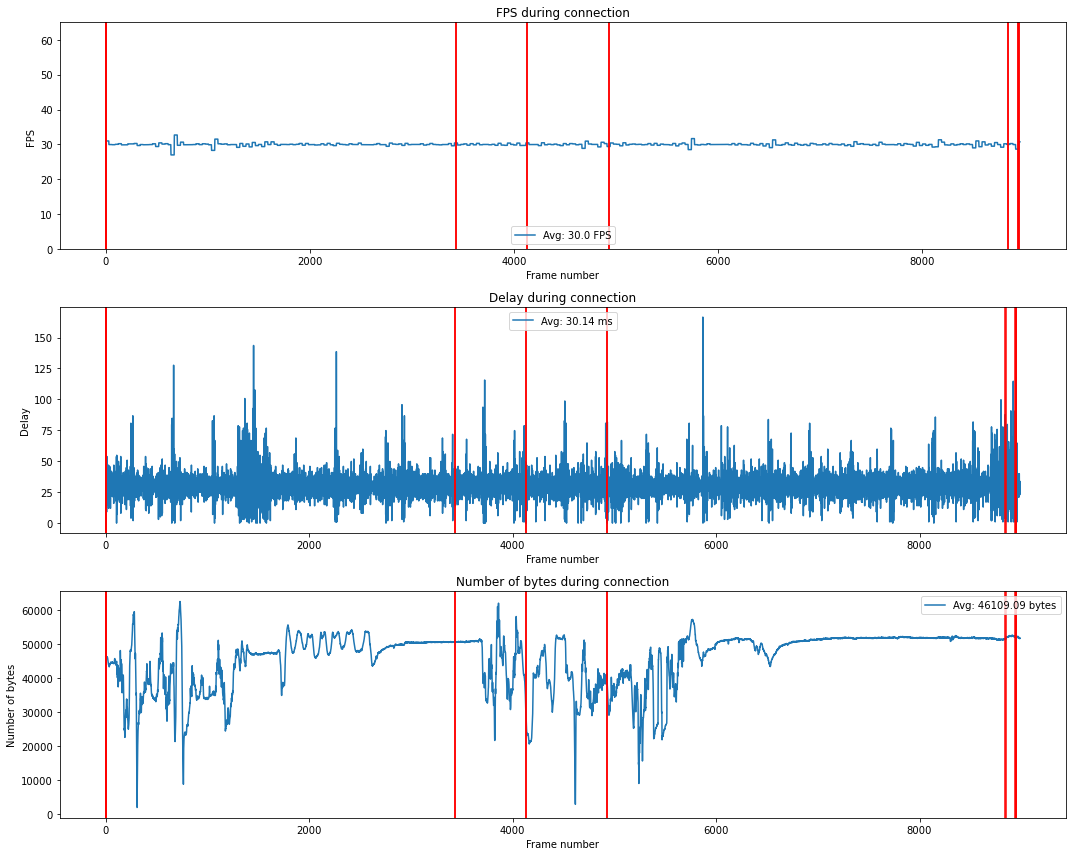

In [29]:
plot_graphs("cam_data_320x240_30fps.npy", fps=30)

# For 320x240 at 60 FPS

Data shape: (4, 17587)
Total frames: 17587
Connection time: 5.0 minutes
Number of frames lost: 285
Percentage of successfully transferred frames: 98.38 %
Percentage of unsuccessfully transferred frames: 1.62 %


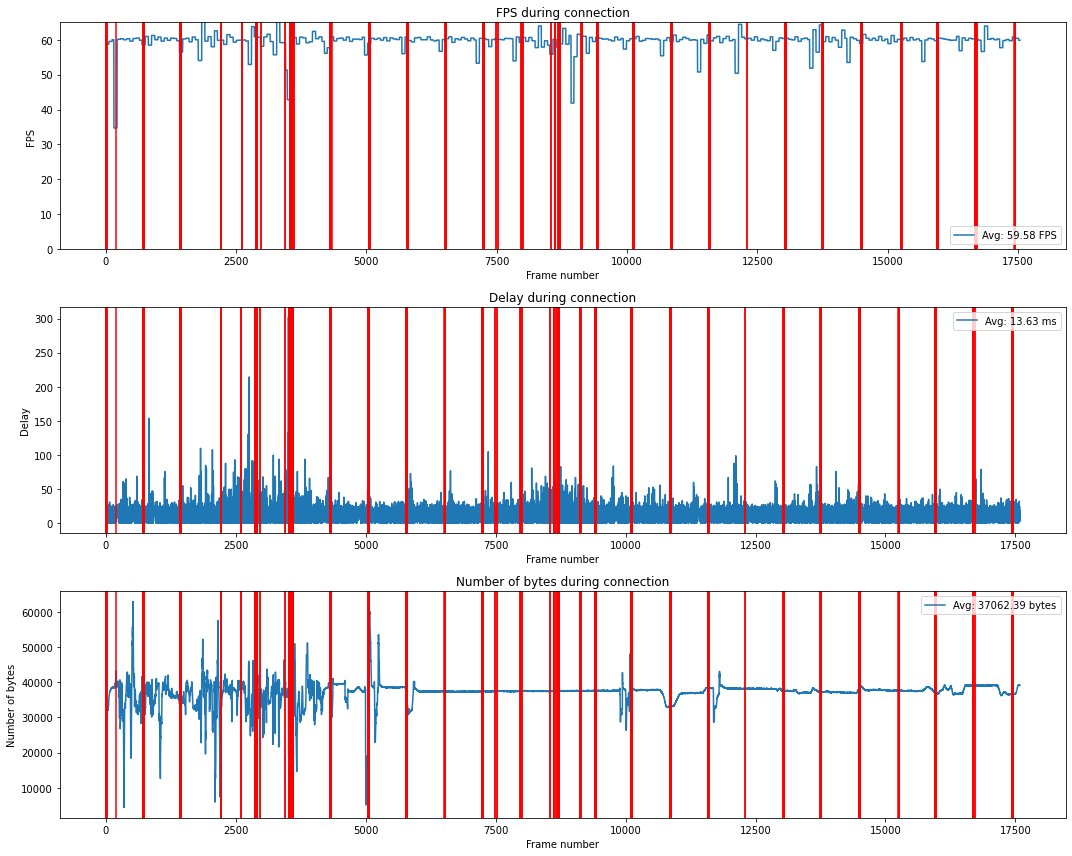

In [31]:
plot_graphs("cam_data_320x240_60fps.npy", fps=60)

# For 640x480 at 30 FPS 

Data shape: (4, 8893)
Total frames: 8893
Connection time: 5.0 minutes
Number of frames lost: 97
Percentage of successfully transferred frames: 98.91 %
Percentage of unsuccessfully transferred frames: 1.09 %


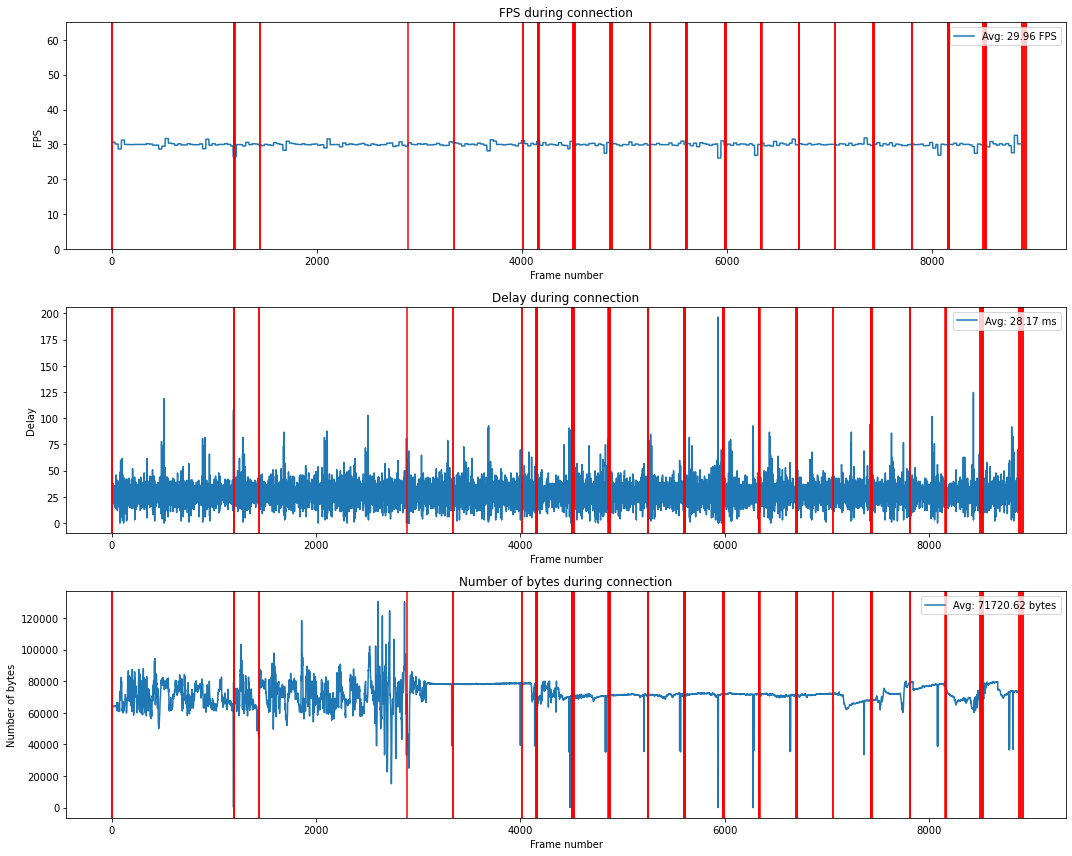

In [32]:
plot_graphs("cam_data_640x480_30fps.npy", fps=30)

# For 640x480 at 60 FPS

Data shape: (4, 17668)
Total frames: 17668
Connection time: 5.0 minutes
Number of frames lost: 261
Percentage of successfully transferred frames: 98.52 %
Percentage of unsuccessfully transferred frames: 1.48 %


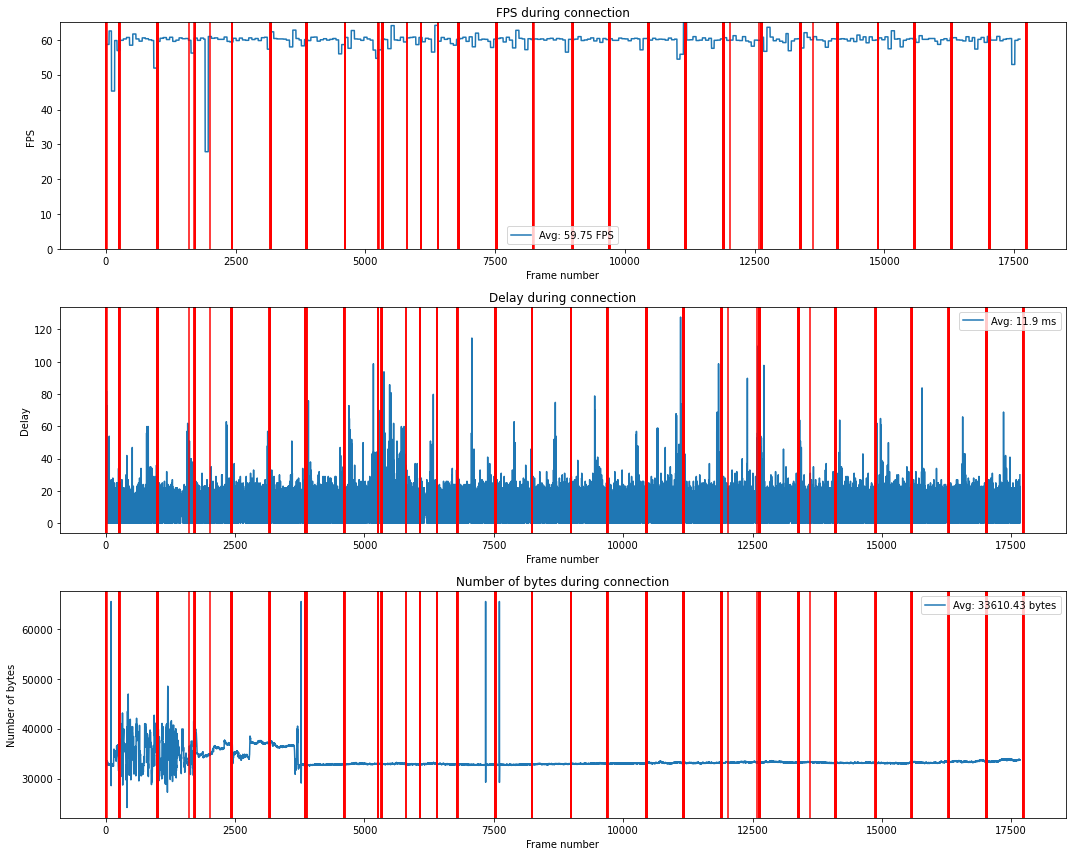

In [33]:
plot_graphs("cam_data_640x480_60fps.npy", fps=60)